### Drug Classification with Various ML Models

*This project to to predict the type of drug which is suitable for patients base on patient dataset*

### 1. Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Reading Dataset

In [2]:
df = pd.read_csv("drug200.csv")

*Have a look at the dataset*

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


*Checking data type and null in the dataset*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
null = df.isnull().sum()
percent = null / df.isnull().count()*100
missing = pd.concat([null, percent],axis=1, keys=["Missing value", "Percent %"])
missing

,Missing value,Percent %
Age,0,0.0
Sex,0,0.0
BP,0,0.0
Cholesterol,0,0.0
Na_to_K,0,0.0
Drug,0,0.0


### 3. Data Exploration

##### 3.1 Category variables

In [6]:
df[["Sex"]].value_counts().to_frame().reset_index()

,Sex,count
0,M,104
1,F,96


In [7]:
df["BP"].value_counts().to_frame().reset_index()

,BP,count
0,HIGH,77
1,LOW,64
2,NORMAL,59


In [8]:
df["Cholesterol"].value_counts().to_frame().reset_index()

,Cholesterol,count
0,HIGH,103
1,NORMAL,97


In [9]:
df["Drug"].value_counts().to_frame().reset_index()

,Drug,count
0,DrugY,91
1,drugX,54
2,drugA,23
3,drugC,16
4,drugB,16


*As we can see, there's a imbalance between types of drug which could affect to model's prediction*

##### 3.2 Numeric variables

In [10]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


### 4. Exploratory Data Analysis

In [11]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


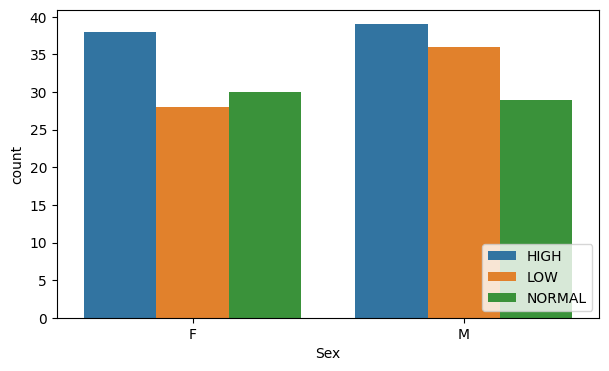

In [12]:
plt.figure(figsize=(7,4))

sns.countplot(data=df,x="Sex", hue="BP")

plt.legend(loc=4)

plt.show()

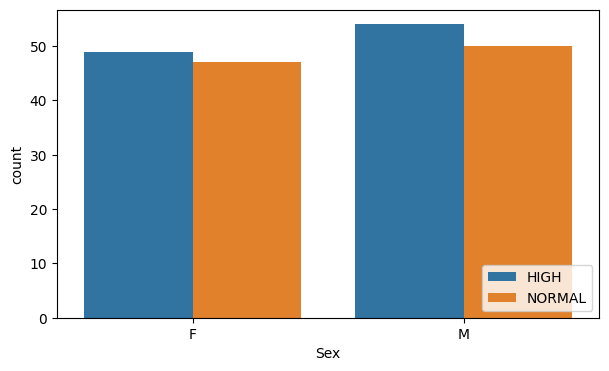

In [13]:
plt.figure(figsize=(7,4))

sns.countplot(data=df,x="Sex", hue="Cholesterol")

plt.legend(loc=4)

plt.show()

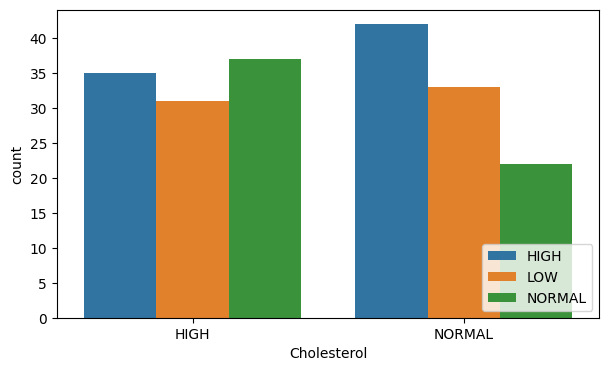

In [14]:
plt.figure(figsize=(7,4))

sns.countplot(data=df,x="Cholesterol", hue="BP")

plt.legend(loc=4)

plt.show()

In [15]:
df[["Age", "Na_to_K"]].corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


*The distribution of features columns are quite balanced, there correlation between 2 numerical columns so we will use both of them for training model*

### 5. Data bining

*Age will be cut into 4 category : Teen, Audlt, Middle-age Adult and Senior Adult*

In [16]:
bin_age = [10, 20, 40, 60, 80]
category_age = ['Teen', 'Adult', 'Middle Age Adult', 'Senior Age Adult']
df['Age_category'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)

In [17]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_category'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)

### 6. Preparing and Pliting Dataset

In [18]:
df_dummies = pd.get_dummies(data=df, columns=["Sex", "BP", "Cholesterol", "Age_category", "Na_to_K_category"])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train = df_dummies.copy()
test = train.pop("Drug")

In [21]:
train = train.drop(["Age", "Na_to_K"], axis=1)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=0)

##### *I make a copy of dataset 2 for training and testing without categoricalize the numerical columns to see if give better result*

In [23]:
train1 = pd.get_dummies(data=df[["Age", "Sex", "BP", "Cholesterol", "Na_to_K", "Drug"]], columns=["Sex", "BP", "Cholesterol"])

In [24]:
test1 = train1.pop("Drug")

In [25]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(train1, test1, test_size=0.3, random_state=0)

### 7. Model

In [26]:
from sklearn.metrics import accuracy_score

##### 7.1 Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [29]:
LR_model = LogisticRegression(solver='liblinear', max_iter=500)
LR_model.fit(x_train, y_train)
y_predict = LR_model.predict(x_test)
LR_acc = accuracy_score(y_predict, y_test)
print("Accuracy of Logistic Regression Model:  {:,.2f}%".format(LR_acc))

Accuracy of Logistic Regression Model:  0.83%


In [28]:
LR_model = LogisticRegression(solver='liblinear', max_iter=500)
LR_model.fit(x_train1, y_train1)
y_predict1 = LR_model.predict(x_test1)
LR_acc1 = accuracy_score(y_predict1, y_test1)
print("Accuracy of Logistic Regression Model:  {:,.2f}%".format(LR_acc1))

Accuracy of Logistic Regression Model:  0.88%


##### 7.2 KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
n = 20
KNN_accuracy = []
for i in range(1,n):
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(x_train, y_train)
    acc =accuracy_score(KNN_model.predict(x_test), y_test)
    KNN_accuracy.append(acc)
print(" The maximum accuracy of this model: {:.2f}%".format(max(KNN_accuracy)))
    

 The maximum accuracy of this model: 0.72%


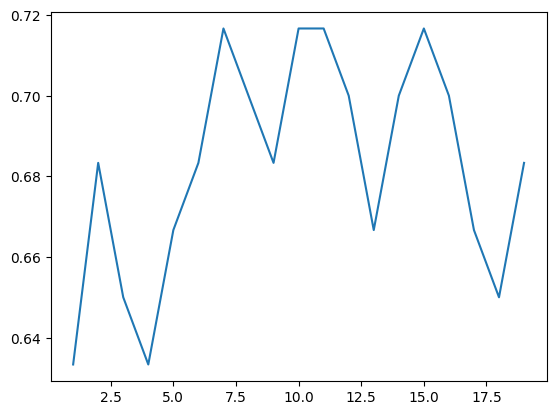

In [32]:
plt.plot(range(1,n),KNN_accuracy)

plt.show()

In [33]:
n1 = 20
KNN_accuracy1 = []
for i in range(1,n):
    KNN_model1 = KNeighborsClassifier(n_neighbors=i)
    KNN_model1.fit(x_train1, y_train1)
    acc1 =accuracy_score(KNN_model1.predict(x_test1), y_test1)
    KNN_accuracy1.append(acc1)
print(" The maximum accuracy of this model: {:.2f}%".format(max(KNN_accuracy1)))

 The maximum accuracy of this model: 0.80%


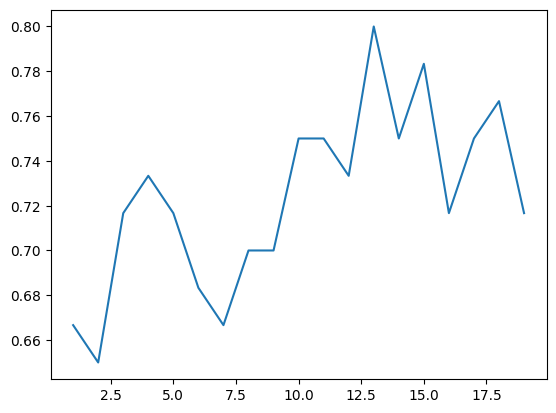

In [34]:
plt.plot(range(1,n),KNN_accuracy1)

plt.show()

##### 7.3 SVM

In [35]:
from sklearn.svm import SVC

In [36]:
SVC_model = SVC(kernel='linear', max_iter=251)
SVC_model.fit(x_train, y_train)
SVC_acc = accuracy_score(SVC_model.predict(x_test), y_test)
print("The accuracy of SVC model: {:,.2f}%".format(SVC_acc))

The accuracy of SVC model: 0.83%


In [37]:
SVC_model1 = SVC(kernel='linear')
SVC_model1.fit(x_train1, y_train1)
SVC_acc1 = accuracy_score(SVC_model1.predict(x_test1), y_test1)
print("The accuracy of SVC model: {:,.2f}%".format(SVC_acc1))

The accuracy of SVC model: 0.98%


In [38]:
x = pd.DataFrame(list(SVC_model1.predict(x_test1)),list(y_test1)).reset_index().rename(columns={"index": "Prediction", 0: "True Value"})
x.head()

,Prediction,True Value
0,drugC,drugC
1,drugX,drugX
2,DrugY,DrugY
3,DrugY,DrugY
4,DrugY,DrugY


#### 7.4 Naive Bayer

7.4.1 Categorical NB

In [39]:
from sklearn.naive_bayes import CategoricalNB

In [40]:
CNB_model = CategoricalNB()
CNB_model.fit(x_train, y_train)
CNB_model_acc = accuracy_score(CNB_model.predict(x_test), y_test)
print("The accuracy of the Categorical Naive Bayer is {:.2f}%".format(CNB_model_acc*100))

The accuracy of the Categorical Naive Bayer is 83.33%


In [41]:
CNB_model1 = CategoricalNB()
CNB_model1.fit(x_train1, y_train1)
CNB_model_acc1 = accuracy_score(CNB_model1.predict(x_test1), y_test1)
print("The accuracy of the Categorical Naive Bayer is {:.2f}%".format(CNB_model_acc1*100))

The accuracy of the Categorical Naive Bayer is 81.67%


7.4.2 Gaussian NB

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
GNB_model = GaussianNB()
GNB_model.fit(x_train, y_train)
GNB_model_acc = accuracy_score(GNB_model.predict(x_test), y_test)
print("The accuracy of the Gaussian Naive Bayer is {:.2f}%".format(GNB_model_acc*100))

The accuracy of the Gaussian Naive Bayer is 83.33%


In [44]:
GNB_model1 = GaussianNB()
GNB_model1.fit(x_train1, y_train1)
GNB_model_acc1 = accuracy_score(GNB_model1.predict(x_test1), y_test1)
print("The accuracy of the Gaussian Naive Bayer is {:.2f}%".format(GNB_model_acc1*100))

The accuracy of the Gaussian Naive Bayer is 75.00%


##### 7.5 Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
DTT_acc = []
for i in range(2,20):
    DT_model = DecisionTreeClassifier(max_leaf_nodes=i)
    DT_model.fit(x_train, y_train)
    DTTacc = accuracy_score(DT_model.predict(x_test), y_test)
    DTT_acc.append(DTTacc)
print("Accuracy of Decision Tree model is: {:.2f}%".format(max(DTT_acc)*100))

Accuracy of Decision Tree model is: 81.67%


In [47]:
DTT_acc1 = []
for i in range(2,20):
    DT_model1 = DecisionTreeClassifier(max_leaf_nodes=i)
    DT_model1.fit(x_train1, y_train1)
    DTTacc1 = accuracy_score(DT_model1.predict(x_test1), y_test1)
    DTT_acc1.append(DTTacc)
print("Accuracy of Decision Tree model is: {:.2f}%".format(max(DTT_acc1)*100))

Accuracy of Decision Tree model is: 78.33%


##### 7.6 Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
RF_acc = []
for i in range(2,20):
    RF_model = DecisionTreeClassifier(max_leaf_nodes=i)
    RF_model.fit(x_train, y_train)
    RFacc = accuracy_score(RF_model.predict(x_test), y_test)
    RF_acc.append(RFacc)
print("Accuracy of Decision Tree model is: {:.2f}%".format(max(RF_acc)*100))

Accuracy of Decision Tree model is: 81.67%


In [58]:
RF_acc1 = []
for i in range(2,20):
    RF_model1 = DecisionTreeClassifier(max_leaf_nodes=i)
    RF_model1.fit(x_train1, y_train1)
    RFacc1 = accuracy_score(RF_model1.predict(x_test1), y_test1)
    RF_acc1.append(RFacc1)
print("Accuracy of Decision Tree model is: {:.2f}%".format(max(RF_acc1)*100))

Accuracy of Decision Tree model is: 100.00%


##### 8. The Result

In [146]:
data = { "Dataset 1" : [round(x*100) for x in [LR_acc ,max(KNN_accuracy), SVC_acc, CNB_model_acc, GNB_model_acc, max(DTT_acc), max(RF_acc)]],
         "Dataset 2" : [round(x*100) for x in [LR_acc1, max(KNN_accuracy1), SVC_acc1, CNB_model_acc1, GNB_model_acc1, max(DTT_acc1), max(RF_acc1)]]
    }

In [147]:
result = pd.DataFrame(data, index=["Logistic Regression", "K Nearest Neighbor", "Support Vector Machine", "Categorical Naive Bayes", 
                                   "Gaussian Naive Bayes", "Decision Tree Classification", "Random Forest Classification"])

In [148]:
result

,Dataset 1,Dataset 2
Logistic Regression,83,88
K Nearest Neighbor,72,80
Support Vector Machine,83,98
Categorical Naive Bayes,83,82
Gaussian Naive Bayes,83,75
Decision Tree Classification,82,78
Random Forest Classification,82,100


#### *So, the best Model is Random Forest Classification with dataset which was not categoricalize numerical columns with accuracy is 100%*

#### 9. Play around with tuning the hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
max_leaf_nodes = list(range(2,20))
max_depth = list(range(2,20))
min_samples_split = list(range(2,5))
min_samples_leaf = list(range(1,4))
max_features = list(range(2,10))
para = dict(max_leaf_nodes = max_leaf_nodes, max_depth = max_depth, min_samples_leaf= min_samples_leaf, min_samples_split=min_samples_split, max_features=max_features)

In [ ]:
dt_hypertune = DecisionTreeClassifier()
grid = RandomizedSearchCV(estimator=dt_hypertune, param_distributions= para, cv=3,n_iter=1000)

In [ ]:
grip_result = grid.fit(x_train, y_train)

In [ ]:
grip_result.best_score_

0.7138452050570461

In [ ]:
grip_result.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 11,
 'max_features': 8,
 'max_depth': 10}

In [ ]:
accuracy_score(grip_result.predict(x_test), y_test)

0.7833333333333333